In [96]:
using CSV, DataFrames
using FileIO, Dates
using Graphs, MetaGraphs
using DataStructures
using PyCall
using Plots, PyPlot; pyplot()

include("./src/cubes.jl")
include("./src/network.jl")

add_properties (generic function with 1 method)

In [97]:
region = "california"

df = CSV.read("./data/$(region).csv", DataFrame);

In [98]:
side = 5

5

In [99]:
df, df_cubes = region_cube_split(df,side=side);

In [100]:
MG = create_network(df, df_cubes)

{19411, 418153} undirected Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)

In [101]:
degrees=[]
indegrees=[]
outdegrees=[]
for i in 1:nv(MG)
    push!(degrees, get_prop(MG, i, :degree))
    push!(indegrees, get_prop(MG, i, :indegree))
    push!(outdegrees, get_prop(MG, i, :outdegree))
end

In [102]:
d = counter(degrees)
Plots.scatter(collect(keys(d)),collect(values(d)),xscale=:log10,yscale=:log10)

ind = counter(indegrees)
Plots.scatter!(collect(keys(ind)),collect(values(ind)),xscale=:log10,yscale=:log10)

outd = counter(outdegrees)
Plots.scatter!(collect(keys(outd)),collect(values(outd)),xscale=:log10,yscale=:log10);

In [105]:
indegrees ./ outdegrees

19411-element Vector{Float64}:
 0.9090909090909091
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

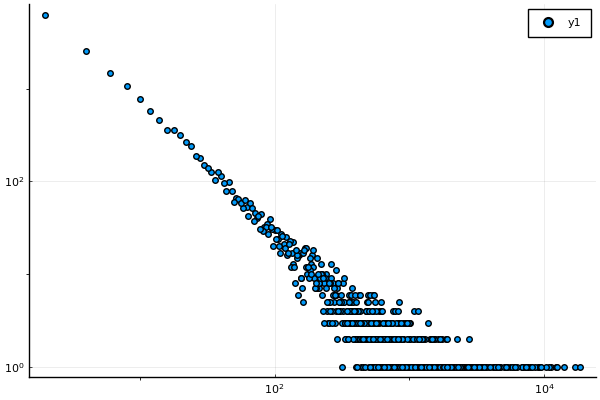

In [103]:
Plots.scatter(collect(keys(d)),collect(values(d)),xscale=:log10,yscale=:log10)

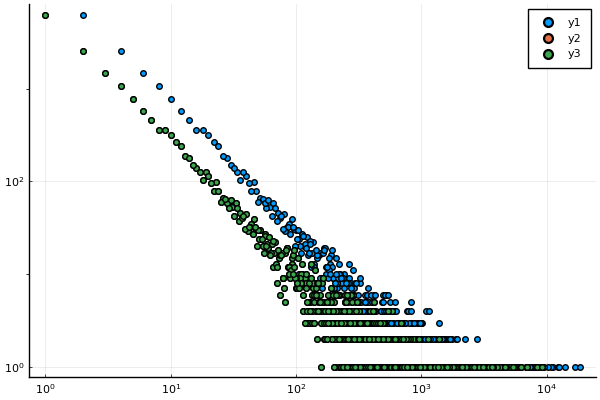

In [104]:
Plots.scatter(collect(keys(d)),collect(values(d)),xscale=:log10,yscale=:log10)
Plots.scatter!(collect(keys(ind)),collect(values(ind)),xscale=:log10,yscale=:log10)
Plots.scatter!(collect(keys(outd)),collect(values(outd)),xscale=:log10,yscale=:log10)

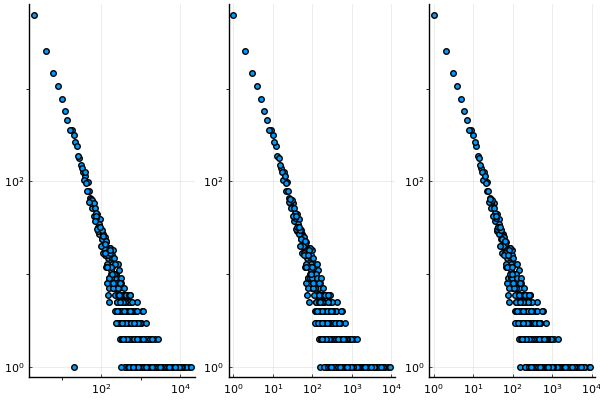

In [8]:
# Plots.plot(p1,p2,p3, layout=(1,3), legend=false)

In [6]:
@pyimport powerlaw as powlaw

5

Calculating best minimal value for power law fit


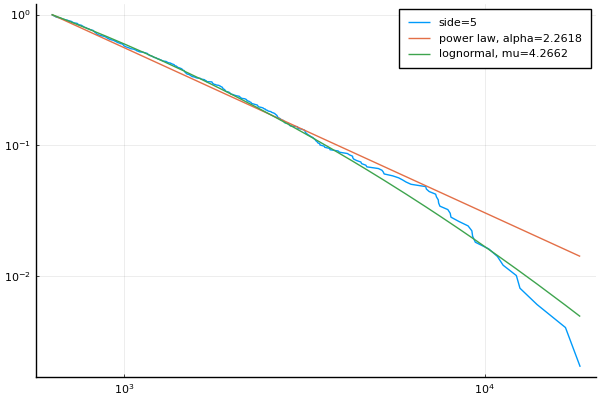

In [57]:
fit = powlaw.Fit(degrees, discrete=true);

# CCDF of data truncated
x_ccdf, y_ccdf = fit.ccdf()
Plots.plot(x_ccdf, y_ccdf, xscale=:log10, yscale=:log10, label="side=$side")

# Theoretical power_law
alpha = round(fit.alpha,digits=4)
fit_degrees_power_law = fit.power_law.plot_ccdf()[:lines][1]
x_powlaw, y_powlaw = fit_degrees_power_law[:get_xdata](), fit_degrees_power_law[:get_ydata]()
Plots.plot!(x_powlaw, y_powlaw, xscale=:log10, yscale=:log10, label="power law, alpha=$(alpha)")

# Theoretical lognormal
mu = round(fit.lognormal.mu, digits=4)
fit_degrees_lognormal = fit.lognormal.plot_ccdf()[:lines][1]
x_lognormal, y_lognormal = fit_degrees_lognormal[:get_xdata](), fit_degrees_lognormal[:get_ydata]()
Plots.plot!(x_lognormal, y_lognormal, xscale=:log10, yscale=:log10, label="lognormal, mu=$(mu)")